<a href="https://colab.research.google.com/github/luiscarlosm33/SIM_YAC_UPSE2023/blob/main/ImplictaTv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import numpy  as np
import math

In [167]:

L=100000
dx=5000
Tiempo=100
DT=1
K=50 #Permeabilidad MD
por=0.2
vis=1 # centipoise
Beta=1
CompTotal=1*10**(-5) #ps1-1
A=200000#ft^2

In [170]:
Alpha=K/(vis*por*CompTotal)
Alpha
Eta=(Alpha*DT)/(dx**2)
Eta

0.9999999999999999

In [171]:
#Condiciones inicialea
Pyac=5
Piz=0
Pder=0
Pin=np.ones((L//dx)+2)
Qres=np.zeros((L//dx))
Pres=np.zeros((L//dx)+2)
Pin=Pin*Pyac
Pin[0]=2*Piz-Pin[1]
Pin[len(Pin)-1]=2*Pder-Pin[len(Pin)-2]

Pin.shape

(22,)

In [172]:
#Esquema Implicito
Pimplicita=np.zeros((Tiempo//DT,(L//dx)+2))
Qimplicita=np.zeros((Tiempo//DT,(L//dx)))
Pres=np.zeros((L//dx)+2)
Pin=np.ones((L//dx)+2)
Pin=Pin*Pyac
Pin[0]=Piz
Pin[len(Pin)-1]=Pder
N=(L//dx)+2
Baccumul=A*dx*por*CompTotal/Beta
Transmisibilidad=(K*A/(vis*Beta*dx))*6.33*10**-3
B=np.zeros([N-2,N-2])
T=np.zeros([N-2,N-2])
Transmisibilidad


12.66

In [183]:
for i in range(0,N-2):
  B[i,i]=Baccumul


for i in range(0,N-2):
  T[i,i]=2*Transmisibilidad
  if i>0:
    T[i,i-1]=-Transmisibilidad
  if i<(N-3):
    T[i,i+1]=-Transmisibilidad
#T[0,0]=3*Transmisibilidad
T[0,0]=2*Transmisibilidad
T[N-3,N-3]=2*Transmisibilidad

T

array([[ 25.32, -12.66,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ],
       [-12.66,  25.32, -12.66,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  , -12.66,  25.32, -12.66,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  , -12.66,  25.32, -12.66,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , -12.66,  25.32, -12.66,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  ,   0.  , -12.66,  25.32, -12.66,   0.  ,
   

In [184]:
Matriz_resolucion=np.zeros_like(T)
Vector_sol=np.zeros_like(Pin[1:-1])
Matriz_resolucion=T+(B/DT)
Vector_sol=np.matmul(B/DT,Pin[1:-1])
#Pres=[]

Q=np.zeros_like(Vector_sol)
Q[0]=2*Transmisibilidad*Piz
Vector_sol=Vector_sol+Q
Vector_sol
Transmisibilidad

12.66

In [185]:
Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)

In [186]:
Pcal

array([4.96874446, 4.99980462, 4.99999878, 4.99999999, 5.        ,
       5.        , 5.        , 5.        , 5.        , 5.        ,
       5.        , 5.        , 5.        , 5.        , 5.        ,
       5.        , 4.99999999, 4.99999878, 4.99980462, 4.96874446])

In [187]:
Vector_sol

array([10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000.])

In [188]:
Qimplicita[0]=Q
t=DT
while t<Tiempo:
  Pcal=np.linalg.solve(Matriz_resolucion,Vector_sol)
  Pres=np.concatenate(([Piz],Pcal,[Pder]))
  Pimplicita[t//DT]=Pres
  Vector_sol=np.matmul(B/DT,Pcal)+Q
  Qimplicita[t//DT]=Vector_sol
  t=t+DT

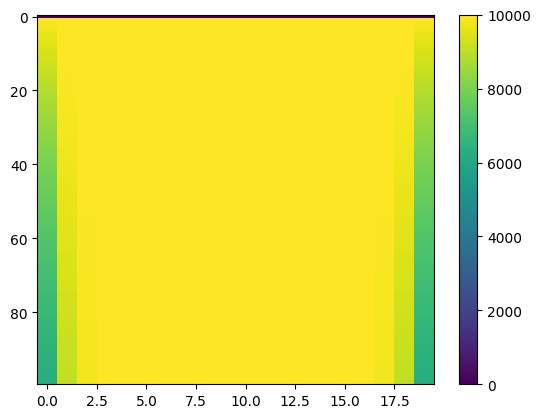

In [189]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Qimplicita,aspect='auto')
plt.colorbar()


In [190]:
Qimplicita.shape

(100, 20)

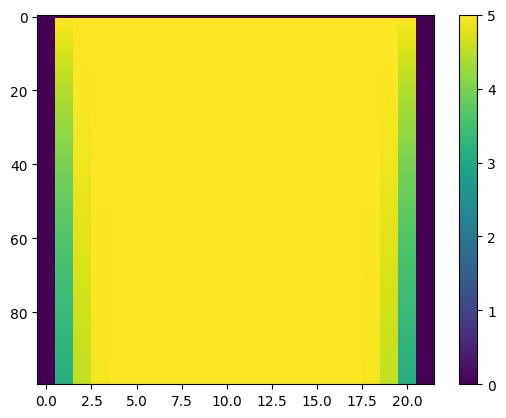

In [191]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(Pimplicita,aspect='auto')
plt.colorbar()